# Playing with Quantum Circuits in Qiskit 

**Quick reference guide to guide to creating circuits and simulating measurements in Qiskit**

This notebook demonstrates some of the ways you can play with circuits using Qiskit, and multiple ways of achieving the same thing where applicable. This is meant to be an easy lookup tool for when you code with Qiskit.

I'll assume you have prior knowledge of quantum states, quantum gates, OpenQASM, and basic Qiskit, especially the QuantumCircuit class.

If not, check these out:
- [Qiskit documentation: QuantumCircuit](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit)
- [Qiskit tutorial: Summary of Quantum Operations](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html)
- [OpenQASM](https://qiskit.github.io/openqasm/language/gates.html)


*Click [here](https://nbviewer.jupyter.org/github/quantum-kittens/quantum-computing-basics/blob/master/Qiskit_Reference_Guides/Playing_with_Quantum_Circuits_in_Qiskit.ipynb) to view this notebook in nbviewer.*

In [ ]:
# run this cell if you're executing this notebook in your browser
!pip install qiskit

from IPython.display import clear_output
clear_output()

In [2]:
from qiskit import *
import numpy as np

## Creating a Quantum Circuit

Creating a circuit with 2 qubits and 2 classical bits.

### Without Registers

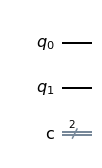

In [3]:
qc = QuantumCircuit(2,2)

qc.draw('mpl')

### With Registers

- [Qiskit documentation: QuantumRegister](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumRegister.html)
- [Qiskit documentation: ClassicalRegister](https://qiskit.org/documentation/stubs/qiskit.circuit.ClassicalRegister.html?highlight=classicalregister#qiskit.circuit.ClassicalRegister)


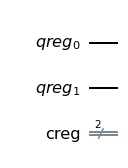

In [4]:
qreg = QuantumRegister(2, name = 'qreg')
creg = ClassicalRegister(2, name = 'creg')

qc = QuantumCircuit(qreg, creg)

qc.draw('mpl')

## The Gate Zoo

All the gates your heart could ever want. Well, most of them.

### Single-Qubit Gates

Bonus: check out the difference between **.draw()** with and without **'mpl'**.

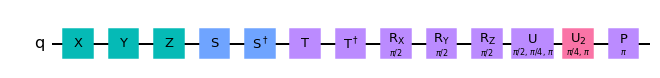

┌───┐┌───┐┌───┐┌───┐┌─────┐┌───┐┌─────┐┌─────────┐┌─────────┐┌─────────┐»
q_0: ┤ X ├┤ Y ├┤ Z ├┤ S ├┤ SDG ├┤ T ├┤ TDG ├┤ RX(π/2) ├┤ RY(π/2) ├┤ RZ(π/2) ├»
     └───┘└───┘└───┘└───┘└─────┘└───┘└─────┘└─────────┘└─────────┘└─────────┘»
«     ┌──────────────┐┌───────────┐┌──────┐
«q_0: ┤ U(π/2,π/4,π) ├┤ U2(π/4,π) ├┤ P(π) ├
«     └──────────────┘└───────────┘└──────┘

In [6]:
qc = QuantumCircuit(1)

# set the angles to whatever you want
theta = np.pi/2
phi = np.pi/4
lambdaa = np.pi

# comment/uncomment the gates to play with them

qc.x(0) # x on qubit 0
qc.y(0) # y on qubit 0
qc.z(0) # z on qubit 0
qc.s(0) # s gate on qubit 0, sqrt of z
qc.sdg(0) # s† on qubit 0
qc.t(0) # t gate on qubit 0, sqrt of s
qc.tdg(0) # t† on qubit 0

### rotations
qc.rx(theta,0) # rx rotation on qubit 0
qc.ry(theta,0) # ry rotation on qubit 0
qc.rz(theta,0) # rz rotation on qubit 0

### generic
qc.u(theta, phi, lambdaa, 0) #u3 gate
qc.u2(phi, lambdaa, 0) #u2 = u3(pi/2, phi, lambdaa)
qc.p(lambdaa, 0) #p = u1 = u3(0, 0, lambdaa)

#

display(qc.draw('mpl'))
display(qc.draw())


### 2-Qubit Gates

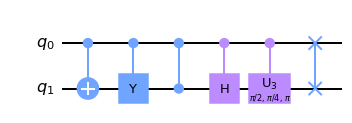

In [9]:
qc = QuantumCircuit(2)

# set the angles to whatever you want
theta = np.pi/2
phi = np.pi/4
lambdaa = np.pi


# comment/uncomment any of the following to your heart's content

qc.cx(0,1) # CNOT with qubit 0 as control and qubit 1 as target
qc.cy(0,1) # controlled-Y with qubit 0 as control and qubit 1 as target
qc.cz(0,1) # controlled-Z with qubit 0 as control and qubit 1 as target
qc.ch(0, 1) # controlled-H with qubit 0 as control and qubit 1 as target
qc.cu3(theta, phi, lambdaa, 0, 1) # controlled-u3 with qubit 0 as control and qubit 1 as target
qc.swap(0,1) # swap qubits 0 and 1

#

qc.draw('mpl')


### 3-Qubit Gates

This shows three ways of creating the **Toffoli gate** with qubits 0 & 1 as controls and qubit 2 as the target. Take particular note of the **circuit library**, **append**, and **.control()**.



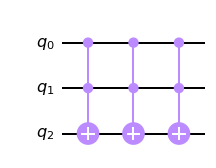

In [10]:
from qiskit.circuit.library import CXGate

qc = QuantumCircuit(3)

# Method 1:
qc.ccx(0,1,2) 


# Method 2:
qc.mct([0,1],2)

#Method 3
our_ccx = CXGate().control()
qc.append(our_ccx, [0,1,2])


qc.draw('mpl')


## Brief Digression: Creating a Bell Circuit

Let's whip up a circuit that generates a Bell state, and then use it as an example for  the rest of this notebook.

$\left|\phi^+\right\rangle = \frac{1}{\sqrt{2}}(\left|00\right\rangle + \left|11\right\rangle)$

$\left|\phi^-\right\rangle = \frac{1}{\sqrt{2}}(\left|00\right\rangle - \left|11\right\rangle)$

$\left|\psi^+\right\rangle = \frac{1}{\sqrt{2}}(\left|01\right\rangle + \left|10\right\rangle)$

$\left|\psi^-\right\rangle = \frac{1}{\sqrt{2}}(\left|01\right\rangle - \left|10\right\rangle)$

To make things as unnecessarily complicated as possible, I'm going with $\left|\psi^-\right\rangle$. 

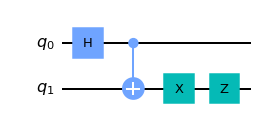

In [11]:
qc_bell = QuantumCircuit(2)

qc_bell.h(0)
qc_bell.cx(0,1)
qc_bell.x(1)
qc_bell.z(1)

display(qc_bell.draw('mpl'))

If you want to quickly double check that the above circuit indeed generates $\left|\psi^-\right\rangle$, you can retrieve the state of the circuit using Statevector. 

In [12]:
from qiskit.quantum_info import Statevector 

state = Statevector(qc_bell)

state.draw('latex', prefix = '\\left|\\psi^-\\right\\rangle = ' )

<IPython.core.display.Latex object>

This isn't the only way to look at states. For more on quantum states, I point you to the reference guide: [Playing with Quantum States in Qiskit](https://nbviewer.jupyter.org/github/quantum-kittens/quantum-computing-basics/blob/master/Qiskit_Reference_Guides/Playing_with_Quantum_States_in_Qiskit.ipynb).

## OpenQASM

### Using OpenQASM to Create a Circuit

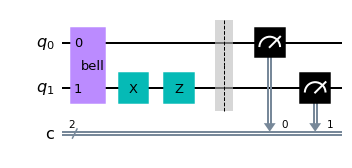

In [13]:
bell_qasm_string = """
OPENQASM 2.0; 
include "qelib1.inc"; 

gate bell a, b {
    u(pi/2, 0, pi) a;
    cx a, b;
}

qreg q[2];
creg c[2];

bell q[0], q[1];
x q[1];
z q[1];

barrier q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];
"""

qc_bell_qasm = QuantumCircuit.from_qasm_str(bell_qasm_string)
qc_bell_qasm.draw('mpl')

This one has measurements. What I'm calling the 'bell' gate is the basic requirement for a Bell state to be generated. The bell gate alone generates the state $\left|\phi^+\right\rangle$. I've made it a little more complicated than it needs to be, just to demonstrate how to define a gate.

And $u(pi/2, 0, pi)$ is the Hadamard gate.



### Return the OpenQASM String for a Circuit

In [14]:
qc_bell_string = qc_bell.qasm()
print(qc_bell_string)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
h q[0];
cx q[0],q[1];
x q[1];
z q[1];



## Unitary Representation of a Circuit

### Method 1: Operator from quantum_info

In [15]:
from qiskit.quantum_info import Operator
from qiskit.visualization import array_to_latex

U = Operator(qc_bell)

array_to_latex(U.data, prefix = 'U = ')

<IPython.core.display.Latex object>

### Method 2: Using the Unitary Simulator

In [16]:
from qiskit.providers.aer import UnitarySimulator

backend = UnitarySimulator() # alternative: backend = Aer.get_backend('unitary_simulator')

job = execute(qc_bell, backend)
U = job.result().get_unitary()

display(array_to_latex(U.data, prefix = 'U = '))



<IPython.core.display.Latex object>

## Simulating Measurements Using the Qasm Simulator

Includes an example of how to use **.compose()**

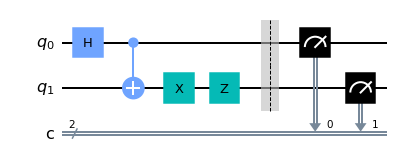

Counts: {'10': 490, '01': 534}


In [17]:
from qiskit.providers.aer import QasmSimulator

qc_measure = QuantumCircuit(2,2)

qc_measure.barrier()
qc_measure.measure([0,1], [0,1]) # alternative: qc_measure.measure_all() = .barrier() + measure every qubit

qc_bell_measure = qc_measure.compose(qc_bell, range(2), front = True) # combines two circuits

display(qc_bell_measure.draw('mpl'))

backend = QasmSimulator() # alternative: backend = Aer.get_backend('qasm_simulator')

job = execute(qc_bell_measure, backend, shots = 1024) # alternative: qc_transpiled = transpile(qc_bell_measure, backend), job = backend.run(qc_transpiled, shots = 1024)

counts = job.result().get_counts()

print('Counts: ' + str(counts))


## Visualizing Measurements Using plot_histogram

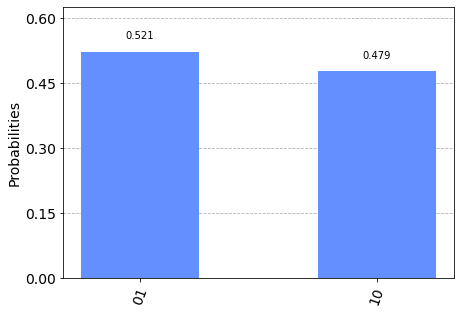

In [18]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

You can do a lot more with histograms. For instance, you can compare the results of two experiments side by side!

In [19]:
job = execute(qc_bell_measure, backend, shots = 1024) 

counts_2 = job.result().get_counts()

print('Counts, second experiment: ' + str(counts_2))

Counts, second experiment: {'10': 525, '01': 499}


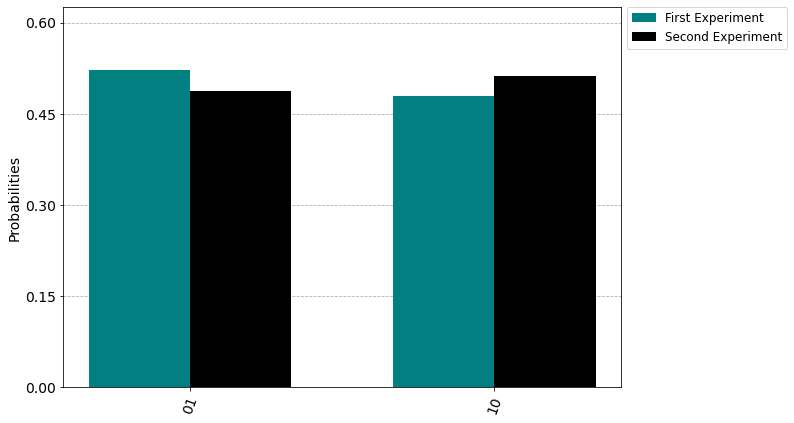

In [20]:
legend = ['First Experiment', 'Second Experiment']
plot_histogram([counts, counts_2], legend = legend, color = ['teal', 'black'], figsize = (10, 7), bar_labels = False)

## More to explore:

- [Adder in OpenQASM](https://github.com/Qiskit/openqasm/blob/master/examples/adder.qasm)
- [Quantum Fridays: Clifford exercises](https://github.com/qiskit-community/quantum-fridays/blob/main/Exercise5.ipynb)
- [Quantum Fridays: Effects of garbage in quantum circuits](https://github.com/qiskit-community/quantum-fridays/blob/main/Exercise6.ipynb)
- [Playing with Quantum States in Qiskit](https://nbviewer.jupyter.org/github/quantum-kittens/quantum-computing-basics/blob/master/Qiskit_Reference_Guides/Playing_with_Quantum_States_in_Qiskit.ipynb)


Created by quantum-kittens